In [4]:
import os
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from sklearn import preprocessing
from scipy import stats
from scipy.stats import zscore
from math import radians, cos, sin, asin, sqrt
import pydot
import seaborn as sns
import keras
import tensorflow as tf
from tensorflow.keras import backend as K
from tensorflow.keras import datasets, layers, models
import os, shutil
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
!pip install category_encoders
import category_encoders as ce
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report

In [5]:
# load in data 
url = 'https://raw.githubusercontent.com/rindalafayyad17/263-Project/main/diabetes_012_health_indicators_BRFSS2015.csv'
diabetes = pd.read_csv(url)


In [6]:
diabetes.shape

(253680, 22)

In [7]:
diabetes['Diabetes_012'].value_counts()

0.0    213703
2.0     35346
1.0      4631
Name: Diabetes_012, dtype: int64

In [8]:
diabetes.head()


,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


We will need several preprocessing steps: 

0. Remove missing rows. We have tons of data so lets just try to drop any rows with NA values. **Turns out there are no missing values**

1. Identify the continuous and catgeorical variables. 

2. Continuous vairables need to be normalized, that is subtract mean and divide by standard deviation. Look at SCM class notes for assistance as sklearn should have package to do this. '

3. Categorical variables will need to be encoded appropriately. 

Continuous variables: 
- BMI, MentHlth, PhysHlth


Categorical Variables:

*Binary:* 
- HighBp, HighCl, CholCheck, Smoker, Stroke, HeartDiseaseorAttack, PhysActivity, Fruits, Veggies, HvyAlcoholConsumption, AnyHealthcare, NoDocbcCost, GenHlth, DiffWalk, Sex

*Ordinal*

- Age, Education, Income

In [9]:
#using category encoders instead
ce_OHE = ce.OneHotEncoder(cols=['Age','Education', 'Income'])

diabetes_final = ce_OHE.fit_transform(diabetes)
print(diabetes_final.head())
diabetes_final.shape

   Diabetes_012  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0           0.0     1.0       1.0        1.0  40.0     1.0     0.0   
1           0.0     0.0       0.0        0.0  25.0     1.0     0.0   
2           0.0     1.0       1.0        1.0  28.0     0.0     0.0   
3           0.0     1.0       0.0        1.0  27.0     0.0     0.0   
4           0.0     1.0       1.0        1.0  24.0     0.0     0.0   

   HeartDiseaseorAttack  PhysActivity  Fruits  ...  Education_5  Education_6  \
0                   0.0           0.0     0.0  ...            0            0   
1                   0.0           1.0     0.0  ...            0            0   
2                   0.0           0.0     1.0  ...            0            0   
3                   0.0           1.0     1.0  ...            0            0   
4                   0.0           1.0     1.0  ...            0            0   

   Income_1  Income_2  Income_3  Income_4  Income_5  Income_6  Income_7  \
0         1         0  

(253680, 46)

In [10]:
# need to make training, validation and test split
features = diabetes_final.drop('Diabetes_012', axis = 1)

# reshape labels and encode them
ce_OHE = ce.OneHotEncoder(cols=['Diabetes_012'])
labels = ce_OHE.fit_transform(diabetes_final)
labels = labels.iloc[:,0:3]

In [11]:
# split into training and testing set 
X_train, X_test, y_train, y_test = train_test_split(features, labels,
    test_size=0.2, shuffle = True, random_state = 356)

# Use the same function above to spliut the training into train and validation set
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, 
    test_size=0.25, random_state= 356) # 0.25 x 0.8 = 0.2

In [12]:
labels.head()

,Diabetes_012_1,Diabetes_012_2,Diabetes_012_3
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [13]:
features.head()

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,Education_5,Education_6,Income_1,Income_2,Income_3,Income_4,Income_5,Income_6,Income_7,Income_8
0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0,0,1,0,0,0,0,0,0,0
1,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0,0,0,1,0,0,0,0,0,0
2,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0,0,0,0,1,0,0,0,0,0
3,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,1.0,...,0,0,0,0,0,1,0,0,0,0
4,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,1.0,...,0,0,0,0,0,0,1,0,0,0


In [14]:
# build and compile model 
# Define model
model = keras.Sequential([
  layers.Dense(256, activation='sigmoid', input_dim = 45),
  layers.Dropout(0.5),

  layers.Dense(128, activation='sigmoid'), 
  layers.Dropout(0.5),

  layers.Dense(32, activation='sigmoid'), 

  layers.Dense(3, activation='softmax') # 3 categories
])

# model compile function
model.compile(loss = 'categorical_crossentropy',
              optimizer = tf.keras.optimizers.RMSprop(),
              metrics = ['accuracy'])

In [15]:
history = model.fit(X_train, 
          y_train, 
          epochs = 100, #change epochs to 100 after testing
          batch_size = 50,
          validation_data=(X_val, y_val)
          )

Epoch 1/100
3045/3045 [==============================] - 23s 7ms/step - loss: 0.4196 - accuracy: 0.8440 - val_loss: 0.3999 - val_accuracy: 0.8498
Epoch 2/100
3045/3045 [==============================] - 17s 6ms/step - loss: 0.4060 - accuracy: 0.8458 - val_loss: 0.3998 - val_accuracy: 0.8481
Epoch 3/100
3045/3045 [==============================] - 9s 3ms/step - loss: 0.4051 - accuracy: 0.8463 - val_loss: 0.4019 - val_accuracy: 0.8487
Epoch 4/100
3045/3045 [==============================] - 9s 3ms/step - loss: 0.4042 - accuracy: 0.8467 - val_loss: 0.4065 - val_accuracy: 0.8436
Epoch 5/100
3045/3045 [==============================] - 9s 3ms/step - loss: 0.4049 - accuracy: 0.8464 - val_loss: 0.3992 - val_accuracy: 0.8503
Epoch 6/100
3045/3045 [==============================] - 9s 3ms/step - loss: 0.4054 - accuracy: 0.8463 - val_loss: 0.4010 - val_accuracy: 0.8496
Epoch 7/100
3045/3045 [==============================] - 9s 3ms/step - loss: 0.4059 - accuracy: 0.8458 - val_loss: 0.4038 - val_

In [16]:
# save model
model.save('Drive/diabetes.h5')

In [17]:
# load model 
new_model = tf.keras.models.load_model("Drive/diabetes.h5")

# Show the model architecture
new_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               11776     
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 32)                4128      
                                                                 
 dense_3 (Dense)             (None, 3)                 99        
                                                                 
Total params: 48,899
Trainable params: 48,899
Non-traina

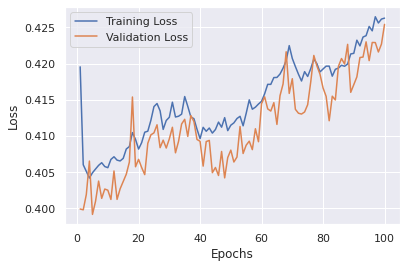

In [18]:
# plot of validation loss and train loss
import seaborn as sns
sns.set()

train_acc  = history.history['accuracy']
train_loss = history.history['loss']
val_acc  = history.history['val_accuracy']
val_loss = history.history['val_loss']

epochs = range(1, len(train_acc) + 1)

plt.plot(epochs, train_loss, label = 'Training Loss')
plt.plot(epochs, val_loss, label = 'Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

In [19]:
# test set accuracy 
test_loss, test_acc = new_model.evaluate(X_test, y_test)
print("The test set accuracy is: ", test_acc)

1586/1586 [==============================] - 3s 2ms/step - loss: 0.4274 - accuracy: 0.8472
The test set accuracy is:  0.847209095954895


#Next steps: 

**Modeling**
- normalize the continuous variables and rerun new model
- try different parameters (probably not epochs and batch size) such as units in hidden layers, depth of layers, activation functions

**Performance Evaluation**
- Create 3 by 3 accuracy table (done with reservations -- see below) 
- Subset data by income level and recreate accuracy tables

Unitless measures such as NPV,PPV may be better for classifcation depending on prevalence of diabetes/prediabetes in the dataset. 

In [20]:
y_proba = new_model.predict(X_test) # need to make this into a vector again of [0,1,2] values and also make y_test back into vector of [0,1,2] 

In [21]:
y_pred = y_proba.argmax(axis = 1) # want 0,1,2 vector
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [22]:
y_proba


array([[0.9374004 , 0.05100873, 0.01159085],
       [0.93743175, 0.05097095, 0.01159721],
       [0.9373997 , 0.05100947, 0.01159079],
       ...,
       [0.9374195 , 0.05098564, 0.01159484],
       [0.9374    , 0.05100929, 0.01159075],
       [0.9374002 , 0.05100891, 0.01159084]], dtype=float32)

In [23]:
# need to y_test to be single vector of 0,1,2 again
y_test_lab = diabetes.iloc[y_test.index, :]["Diabetes_012"] # must check if this actually works as desired
print(y_test_lab)
y_pred

193256    0.0
52416     0.0
125094    0.0
74892     0.0
1357      0.0
         ... 
87225     0.0
70127     0.0
78535     0.0
210913    2.0
72847     0.0
Name: Diabetes_012, Length: 50736, dtype: float64


array([0, 0, 0, ..., 0, 0, 0])

In [24]:
# create accuracy table 
#importing confusion matrix
confusion = confusion_matrix(y_test_lab, y_pred)
print('Confusion Matrix\n')
print(confusion)

#importing accuracy_score, precision_score, recall_score, f1_score
print('\nAccuracy: {:.2f}\n'.format(accuracy_score(y_test_lab, y_pred)))

print('\nClassification Report\n')
print(classification_report(y_test_lab, y_pred, target_names=['No diabetes', 'Prediabetes', 'Diabetes']))

Confusion Matrix

[[42018   689     0]
 [  864    68     0]
 [ 6131   966     0]]

Accuracy: 0.83


Classification Report

              precision    recall  f1-score   support

 No diabetes       0.86      0.98      0.92     42707
 Prediabetes       0.04      0.07      0.05       932
    Diabetes       0.00      0.00      0.00      7097

    accuracy                           0.83     50736
   macro avg       0.30      0.35      0.32     50736
weighted avg       0.72      0.83      0.77     50736



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Subset the Data (Income) and Recalculate Accuracy

In [25]:
 # 8 is above $75,000, 5 is below 35,000
 # maybe start with split of below 5 and above 5 
diabetes['Income'].value_counts()

8.0    90385
7.0    43219
6.0    36470
5.0    25883
4.0    20135
3.0    15994
2.0    11783
1.0     9811
Name: Income, dtype: int64

In [26]:
# X test of only > 5 income 
X_test_high = X_test[(X_test["Income_6"] == 1.0) | (X_test["Income_7"] == 1.0) | (X_test["Income_8"] == 1.0)]
high_indx = X_test_high.index

# X test of only <= 5 income 
X_test_low = X_test[(X_test["Income_1"] == 1.0) | (X_test["Income_2"] == 1.0) | (X_test["Income_3"] == 1.0) | (X_test["Income_4"] == 1.0) | (X_test["Income_5"] == 1.0)]
low_indx = X_test_low.index


# y test of only same sebsets above
y_test_high = y_test[y_test.index.isin(high_indx)]
y_test_low = y_test[y_test.index.isin(low_indx)]

y_test_high

,Diabetes_012_1,Diabetes_012_2,Diabetes_012_3
204300,1,0,0
187954,1,0,0
205236,1,0,0
104585,1,0,0
113139,1,0,0
...,...,...,...
252276,1,0,0
94259,1,0,0
241228,1,0,0
62941,1,0,0


In [27]:
# high index accuracies 
y_proba_high = new_model.predict(X_test_high)

In [28]:
y_proba_high

array([[0.48920798, 0.4718651 , 0.03892694],
       [0.93743175, 0.05097095, 0.01159721],
       [0.9374002 , 0.05100911, 0.01159076],
       ...,
       [0.9374001 , 0.0510091 , 0.0115908 ],
       [0.93743175, 0.05097095, 0.01159721],
       [0.9374044 , 0.05100388, 0.01159169]], dtype=float32)

In [29]:
y_pred_high = y_proba_high.argmax(axis = 1) # want 0,1,2 vector
y_pred_high

array([0, 0, 0, ..., 0, 0, 0])

In [30]:
# need to y_test to be single vector of 0,1,2 again
y_test_lab_high = diabetes.iloc[y_test_high.index, :]['Diabetes_012']
y_test_lab_high

204300    0.0
187954    0.0
205236    0.0
104585    0.0
113139    0.0
         ... 
252276    0.0
94259     0.0
241228    0.0
62941     0.0
152849    0.0
Name: Diabetes_012, Length: 16133, dtype: float64

In [31]:
# create accuracy table 
#importing confusion matrix
confusion = confusion_matrix(y_test_lab_high, y_pred_high)
print('Confusion Matrix\n')
print(confusion)

#importing accuracy_score, precision_score, recall_score, f1_score
print('\nAccuracy: {:.2f}\n'.format(accuracy_score(y_test_lab_high, y_pred_high)))

print('\nClassification Report\n')
print(classification_report(y_test_lab_high, y_pred_high, target_names=['No diabetes', 'Prediabetes', 'Diabetes']))

Confusion Matrix

[[13005   218     0]
 [  301    23     0]
 [ 2250   336     0]]

Accuracy: 0.81


Classification Report

              precision    recall  f1-score   support

 No diabetes       0.84      0.98      0.90     13223
 Prediabetes       0.04      0.07      0.05       324
    Diabetes       0.00      0.00      0.00      2586

    accuracy                           0.81     16133
   macro avg       0.29      0.35      0.32     16133
weighted avg       0.69      0.81      0.74     16133



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [32]:
# repeat above for low 
# high index accuracies 
y_proba_low = new_model.predict(X_test_low)

y_pred_low = y_proba_low.argmax(axis = 1) # want 0,1,2 vector

# need to y_test to be single vector of 0,1,2 again
y_test_lab_low = diabetes.iloc[y_test_low.index, :]['Diabetes_012']
y_test_lab_low

193256    0.0
52416     0.0
125094    0.0
74892     0.0
1357      0.0
         ... 
87225     0.0
70127     0.0
78535     0.0
210913    2.0
72847     0.0
Name: Diabetes_012, Length: 34603, dtype: float64

In [33]:
# create accuracy table 
#importing confusion matrix
confusion = confusion_matrix(y_test_lab_low, y_pred_low)
print('Confusion Matrix\n')
print(confusion)

#importing accuracy_score, precision_score, recall_score, f1_score
print('\nAccuracy: {:.2f}\n'.format(accuracy_score(y_test_lab_low, y_pred_low)))


print('\nClassification Report\n')
print(classification_report(y_test_lab_low, y_pred_low, target_names=['No diabetes', 'Prediabetes', 'Diabetes']))

Confusion Matrix

[[29013   471     0]
 [  563    45     0]
 [ 3881   630     0]]

Accuracy: 0.84


Classification Report

              precision    recall  f1-score   support

 No diabetes       0.87      0.98      0.92     29484
 Prediabetes       0.04      0.07      0.05       608
    Diabetes       0.00      0.00      0.00      4511

    accuracy                           0.84     34603
   macro avg       0.30      0.35      0.32     34603
weighted avg       0.74      0.84      0.79     34603



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Next steps: 

Change the batch size to be larger and then can potentially make the epoch a little bit smaller. (daniel) 

1) **Look at models and see that the accuracy/test errors make sense**(Bhawesh and Lauren)
*instead will look at the binary split dataset*


For the R code, make 3 by 3 confusion matrices. (Willow) 

Calculate the accuracy for these models. (Willow)

Look into PPV, NPV and compare these. (look into after?)


Look at PCA (Rindala) 


1. Actually, we will just include a statement about why the unbalanced dataset did not work/issues it had. 